# Regressão 01 - tarefa 02 - transformações em X e Y

## 1 Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
# Importando os dados
df = sns.load_dataset("tips")
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])
df['net_bill'] = df['total_bill'] - df['tip']

df_copy = df[df['tip_pct']<.5].copy()

df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
'''
Modelo de Regressão Linear Simples com a variável independente conta líquida
(net_bill) e variável dependente gorgeta em porcentagem (tip_pct)
'''
reg_tip = smf.ols('tip_pct ~ net_bill', data=df_copy).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.31e-12
Time:                        17:47:07   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

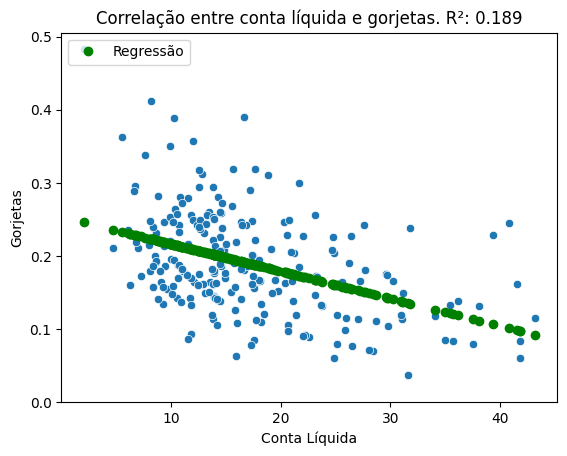

In [4]:
# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = df_copy['tip_pct']
y_pred_tip = reg_tip.fittedvalues

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip, 'og', label='Regressão')

# Calculando o R²
r_square_tip_1 = round(r2_score(y_obs_tip, y_pred_tip), 3)

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas. R²: {r_square_tip_1}")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

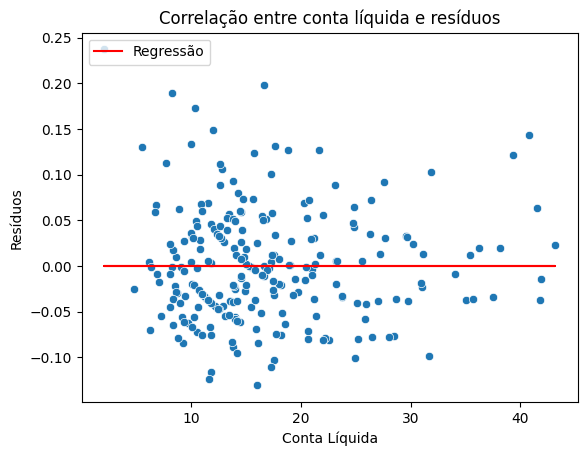

In [5]:
# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = reg_tip.resid

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, [0]*len(y_obs_tip), '-r', label='Regressão')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e resíduos")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")

plt.show()



---



## 2 Ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

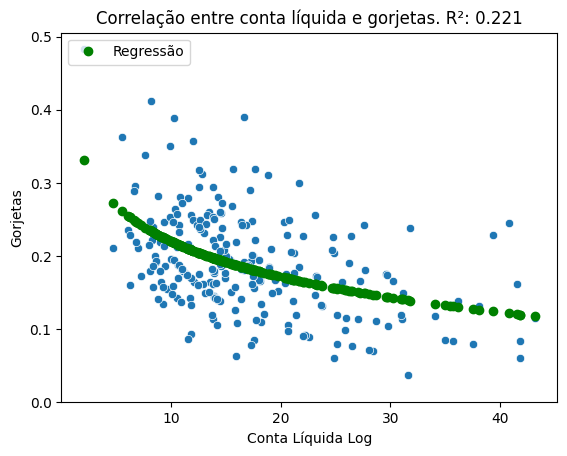

In [6]:
'''
Modelo de Regressão Linear Simples com a variável independente logarítmo da
conta líquida (net_bill) e variável dependente gorgeta em porcentagem (tip_pct)
'''
reg_tip = smf.ols('tip_pct ~ np.log(net_bill)', data=df_copy).fit()

# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = df_copy['tip_pct']
y_pred_tip = reg_tip.fittedvalues
pred = y_pred_tip.copy()

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip, 'og', label='Regressão')

# Calculando o R²
r_square_tip_2 = round(r2_score(y_obs_tip, y_pred_tip), 3)

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas. R²: {r_square_tip_2}")
plt.xlabel("Conta Líquida Log")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

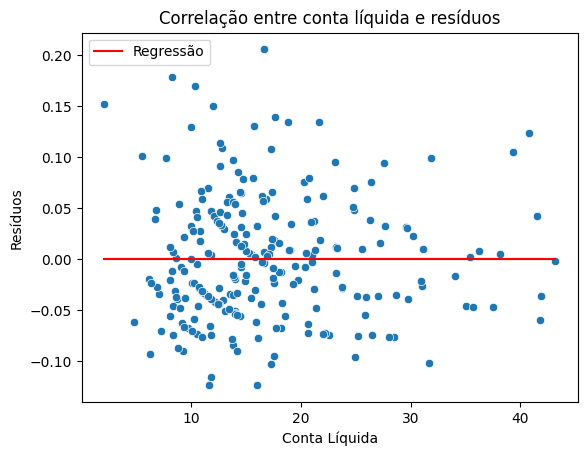

In [7]:
# Instanciando as variáveis com os dados
y_obs_tip = reg_tip.resid

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, [0]*len(y_obs_tip), '-r', label='Regressão')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e resíduos")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")

plt.show()



---



##  3 Ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

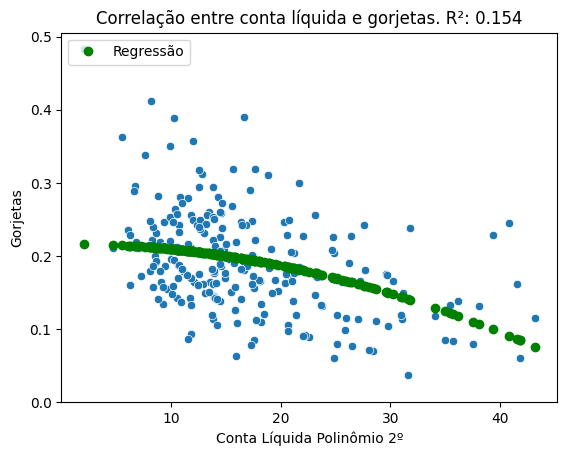

In [8]:
'''
Modelo de Regressão Linear Simples com a variável independente polinomial da
conta líquida (net_bill) e variável dependente gorgeta em porcentagem (tip_pct)
'''
reg_tip = smf.ols('tip_pct ~ np.power(net_bill, 2)', data=df_copy).fit()

# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = df_copy['tip_pct']
y_pred_tip = reg_tip.fittedvalues

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip, 'og', label='Regressão')

# Calculando o R²
r_square_tip_3 = round(r2_score(y_obs_tip, y_pred_tip), 3)

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas. R²: {r_square_tip_3}")
plt.xlabel("Conta Líquida Polinômio 2º")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

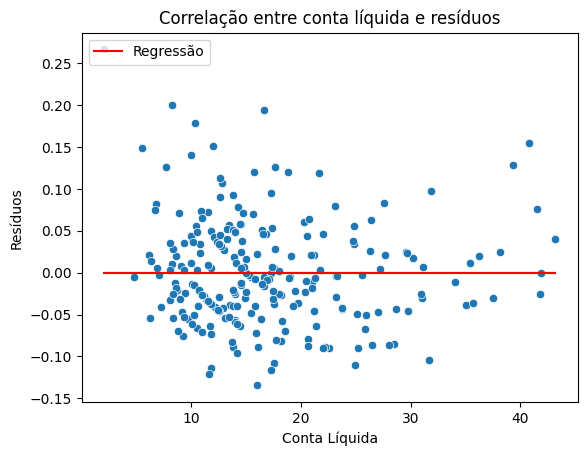

In [9]:
# Instanciando as variáveis com os dados
y_obs_tip = reg_tip.resid

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, [0]*len(y_obs_tip), '-r', label='Regressão')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e resíduos")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")

plt.show()



---



##  4 Ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

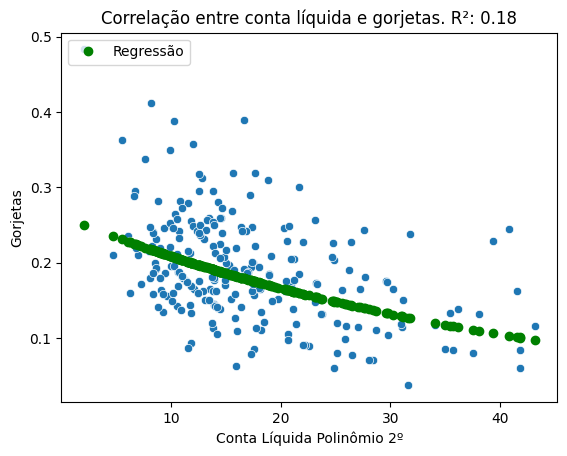

In [10]:
'''
Modelo de Regressão Linear Simples com a variável independente conta líquida
(net_bill) e variável dependente logaritmica gorgeta em porcentagem (tip_pct)
'''
reg_tip = smf.ols('np.log(tip_pct) ~ net_bill', data=df_copy).fit()

# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = df_copy['tip_pct']
y_pred_tip = np.exp(reg_tip.fittedvalues)

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip, 'og', label='Regressão')

# Calculando o R²
r_square_tip_4 = round(r2_score(y_obs_tip, y_pred_tip), 3)

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas. R²: {r_square_tip_4}")
plt.xlabel("Conta Líquida Polinômio 2º")
plt.ylabel("Gorjetas")

plt.show()

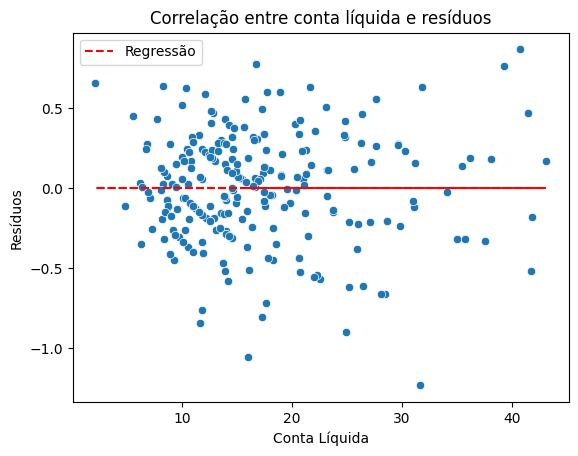

In [11]:
# Instanciando as variáveis com os dados
y_obs_tip = reg_tip.resid

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, [0]*len(y_obs_tip), '--r', label='Regressão')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e resíduos")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")

plt.show()



---



##  5 Ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

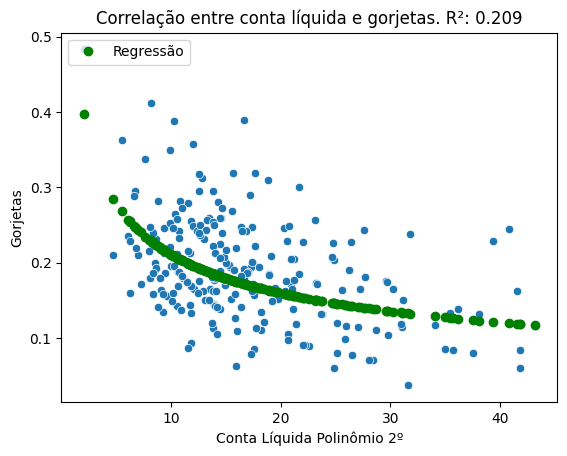

In [12]:
'''
Modelo de Regressão Linear Simples com a variável independente logarítmo da
conta líquida (net_bill) e variável dependente logaritmicagorgeta em
porcentagem (tip_pct)
'''
reg_tip = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=df_copy).fit()

# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = df_copy['tip_pct']
y_pred_tip = np.exp(reg_tip.fittedvalues)

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip, 'og', label='Regressão')

# Calculando o R²
r_square_tip_5 = round(r2_score(y_obs_tip, y_pred_tip), 3)

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas. R²: {r_square_tip_5}")
plt.xlabel("Conta Líquida Polinômio 2º")
plt.ylabel("Gorjetas")

plt.show()

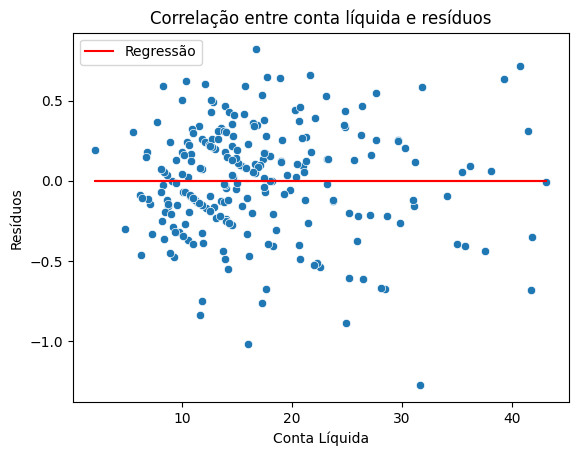

In [13]:
# Instanciando as variáveis com os dados
y_obs_tip = reg_tip.resid

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, [0]*len(y_obs_tip), '-r', label='Regressão')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e resíduos")
plt.xlabel("Conta Líquida")
plt.ylabel("Resíduos")

plt.show()



---



##  6 Qual modelo resultou no melhor ajuste?

In [14]:
print(f"Ñ transformada R²:  {r_square_tip_1}")
print(f"log(x) R²:          {r_square_tip_2}")
print(f"x**2 R²:            {r_square_tip_3}")
print(f"log(y) R²:          {r_square_tip_4}")
print(f"log(x) e log(y) R²: {r_square_tip_5}")

Ñ transformada R²:  0.189
log(x) R²:          0.221
x**2 R²:            0.154
log(y) R²:          0.18
log(x) e log(y) R²: 0.209


### Conclusão

- O modelo com o melhor coeficiente de diferenciação, R² = 0.221, foi na transformações logaritmica da conta líquida `np.log(net_bill)`



---



# Análise extra

In [15]:
# Calculando R com base no R²
print(f"R: {r_square_tip_2**0.5:.3f}")

R: 0.470


In [16]:
# Calculando R² com base no R
print(f'''R²: {pd.DataFrame(
    data={
        'y': df_copy['tip_pct'],
        'pred': pred
    }
).corr().iloc[0,1]**2:.3f}''')

R²: 0.221
